### Problem Statement

You are a data scientist / AI engineer working on a classification problem to predict the likelihood of heart failure events based on clinical records. You have been provided with a dataset named **`"heart_failure_clinical_records.csv"`** which includes various clinical parameters of patients. The dataset comprises the following columns:

- age: Age of the patient (years)
- anaemia: Decrease of red blood cells or hemoglobin (boolean)
- creatinine_phosphokinase: Level of the CPK enzyme in the blood (mcg/L)
- diabetes: If the patient has diabetes (boolean)
- ejection_fraction: Percentage of blood leaving the heart at each contraction (percentage)
- high_blood_pressure: If the patient has hypertension (boolean)
- platelets: Platelets in the blood (kiloplatelets/mL)
- serum_creatinine: Level of serum creatinine in the blood (mg/dL)
- serum_sodium: Level of serum sodium in the blood (mEq/L)
- sex: Sex of the patient (binary, 1 for male, 0 for female)
- smoking: If the patient smokes or not (boolean)
- time: Follow-up period (days)
- death_event: If the patient died during the follow-up period (boolean)

Your task is to use this dataset to build and evaluate machine learning models to predict heart failure events. You will perform data preprocessing, exploratory data analysis, and model training using GaussianNB, SVM, and XGBoost. Additionally, you will use ROC curves to analyze model performance and make cost-benefit decisions.

**Dataset credits:** Heart Failure Clinical Records. (2020). UCI Machine Learning Repository. https://doi.org/10.24432/C5Z89R.



**Import Necessary Libraries**

In [54]:
# Import Necessary Libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.preprocessing import StandardScaler

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report ,roc_curve
 

### Task 1: Data Preprocessing and Exploratory Data Analysis

1. Import the data from the `"heart_failure_clinical_records.csv"` file and store it in a DataFrame.
2. Display the number of rows and columns in the dataset.
3. Display the first few rows of the dataset to get an overview.
4. Check for missing values and handle them appropriately.
5. Perform basic statistical analysis and visualization to understand the distribution of each feature.
    - Use `histograms` for continuous features (age, creatinine_phosphokinase, ejection_fraction, platelets, serum_creatinine, serum_sodium, time).
    - Use `bar plots` for binary features (anaemia, diabetes, high_blood_pressure, sex, smoking).

In [38]:

# Import the data from the "heart_failure_clinical_records.csv" file and store it in a DataFrame.
df  = pd.read_csv("heart_failure_clinical_records.csv")

# Display the number of rows and columns in the dataset.
df.shape

# Display the first few rows of the dataset to get an overview
df.head()


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1


In [39]:
# Check for missing values and handle them appropriately.
df.isnull().sum()


age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
death_event                 0
dtype: int64

(array([4168.,  377.,  218.,  125.,    0.,   44.,   15.,   18.,    0.,
          35.]),
 array([  23. ,  806.8, 1590.6, 2374.4, 3158.2, 3942. , 4725.8, 5509.6,
        6293.4, 7077.2, 7861. ]),
 <BarContainer object of 10 artists>)

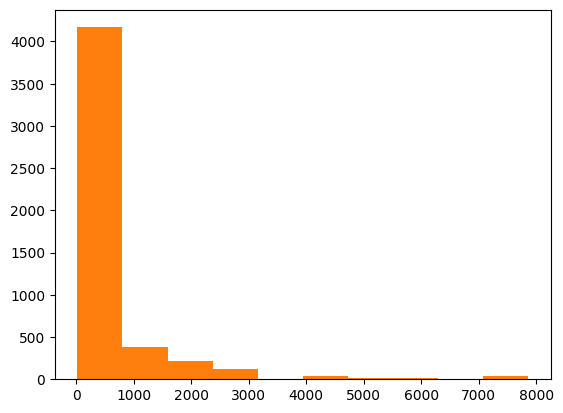

In [40]:
# Perform basic statistical analysis and visualization to understand the distribution of each feature

#i) Histograms for continuous features (age, creatinine_phosphokinase, ejection_fraction, platelets, serum_creatinine, serum_sodium, time).
plt.hist(df["age" ])
plt.hist(df[ "creatinine_phosphokinase"])

In [41]:
df["anaemia"].value_counts()

anaemia
0    2628
1    2372
Name: count, dtype: int64

<BarContainer object of 5000 artists>

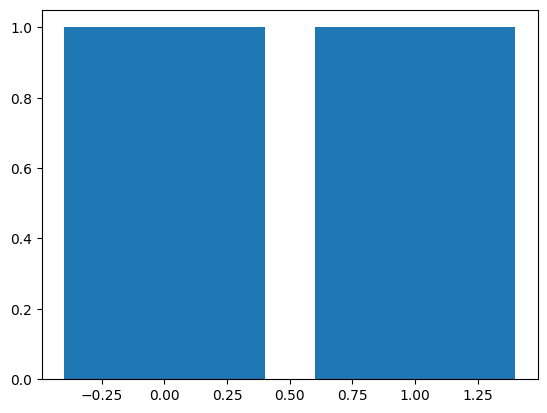

In [43]:
# Bar plots for binary features (anaemia, diabetes, high_blood_pressure, sex, smoking).
plt.bar(df["anaemia"] , max(df["anaemia"]))

### Task 2: Feature Transformation

1. Split the dataset into training and test sets with a test size of 25%.
2. Normalize continuous features (age, creatinine_phosphokinase, ejection_fraction, platelets, serum_creatinine, serum_sodium, time) using StandardScaler.

In [44]:
# Split the dataset into training and test sets
X  = df.drop(["death_event"] , axis = 1)
y = df["death_event"]

X_train , X_test , y_train , y_test  = train_test_split(X , y , test_size = 0.2, random_state = 42)



In [45]:
X_train.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
4227,58.0,1,57,0,25,0,189000.0,1.3,132,1,1,205
4676,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285
800,50.0,0,369,0,40,0,203000.0,1.0,138,1,0,90
3671,42.0,0,64,0,40,0,189000.0,0.7,140,1,0,245
4193,42.0,0,102,0,25,0,244000.0,1.2,142,0,0,74


In [48]:
# Normalize continuous features using StandardScaler
scaler = StandardScaler()

X_train_standard = scaler.fit_transform(X_train)
X_test_standard  = scaler.fit_transform(X_test)


array([[-0.20303067,  1.0523695 , -0.53412677, ...,  0.74431281,
         1.50597937,  0.95350361],
       [-0.88759513, -0.95023659, -0.39656197, ...,  0.74431281,
         1.50597937,  1.98540252],
       [-0.88759513, -0.95023659, -0.22534822, ...,  0.74431281,
        -0.66401972, -0.52985107],
       ...,
       [-0.88759513,  1.0523695 , -0.48068433, ...,  0.74431281,
        -0.66401972, -1.60044619],
       [ 1.67952159, -0.95023659,  0.20615001, ...,  0.74431281,
        -0.66401972, -0.28477508],
       [-0.03188956,  1.0523695 , -0.27879066, ...,  0.74431281,
         1.50597937, -1.56174998]])

### Task 3: Model Training and Evaluation with GaussianNB

1. Initialize and train a `GaussianNB` model using the training data.
2. Print the classification report to evaluate the model's performance.
3. Calculate the AUC for the GaussianNB model.
4. Find the probability threshold associated with a desired recall of 85% and print the corresponding false positive rate.

In [50]:
# Initialize and train a GaussianNB model
GaussianNB_model = GaussianNB()
GaussianNB_model.fit(X_train_standard , y_train)

y_predict_NB = GaussianNB_model.predict(X_test_standard  )
# Print the classification report
report = classification_report(y_predict_NB , y_test)
print(report)


              precision    recall  f1-score   support

           0       0.92      0.81      0.86       789
           1       0.51      0.73      0.60       211

    accuracy                           0.80      1000
   macro avg       0.72      0.77      0.73      1000
weighted avg       0.83      0.80      0.81      1000



In [51]:
dir(GaussianNB_model)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__sklearn_tags__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_build_request_for_signature',
 '_check_X',
 '_check_feature_names',
 '_check_n_features',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_estimator_type',
 '_get_default_requests',
 '_get_doc_link',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_joint_log_likelihood',
 '_more_tags',
 '_parameter_constraints',
 '_partial_fit',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_update_mean_variance',
 '_validate_data',
 '_validat

In [57]:
y_test.value_counts()

death_event
0    698
1    302
Name: count, dtype: int64

In [61]:
# Calculate the AUC for the GaussianNB model.
probabilities_NB  = GaussianNB_model.predict_proba(X_test_standard)[: , 1]

fpr , tpr , thresolds  = roc_curve( y_test,probabilities_NB )


In [10]:
# Find the probability threshold associated with 85% recall
prefered_recall = 0.85

closest_index  = argmini(abs(prefered_recall - tpr))


### Task 4: Model Training and Evaluation with SVM

1. Initialize and train an `SVM` model with a linear kernel using the training data.
2. Print the classification report to evaluate the model's performance.
3. Calculate the AUC for the SVM model.
4. Find the probability threshold associated with a desired recall of 90% and print the corresponding false positive rate.

In [11]:
# Initialize and train an SVM model with a linear kernel



# Print the classification report



In [12]:
# Calculate the AUC



In [13]:
# Find the probability threshold associated with 90% recall



### Task 5: Model Training and Evaluation with XGBoost

1. Initialize and train an `XGBoost` model using the training data.
2. Print the classification report to evaluate the model's performance.
3. Calculate the AUC for the XGBoost model.

In [14]:

# Initialize and train an XGBoost model



# Print the classification report




In [15]:
# Calculate the AUC


### Task 6: Summary and Conclusion

1. Plot the ROC curves for `GaussianNB, SVM, and XGBoost` models on the same chart.
2. Summarize the results and compare the performance of the models.

In [16]:
# Plot the ROC curves for all models


### Conclusion

--------
--------
